In [1]:
% load_ext autoreload
% autoreload 2
from algorithms.GMM import GMM
import datetime

start_time = datetime.datetime(2018, 2, 7)
end_time = datetime.datetime(2018, 2, 8)
gmm = GMM(start_time, end_time, 'cvw', n_clusters=30, useSavedResult=False)
gmm.save_result()
print(gmm.runtime)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
dict_keys(['gate', 'beam', 'vel', 'wid', 'time', 'trad_gsflg', 'elv', 'nrang', 'nbeam'])
426.61353182792664


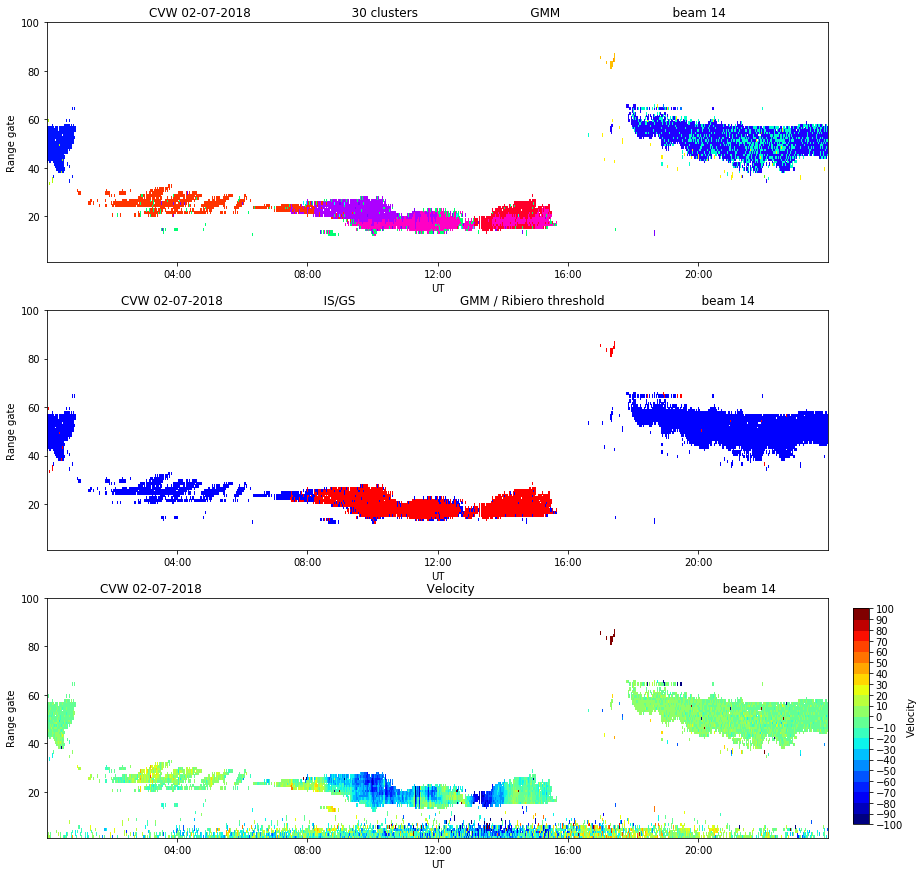

In [2]:
%matplotlib inline
gmm.plot_rti(14, 'Ribiero')

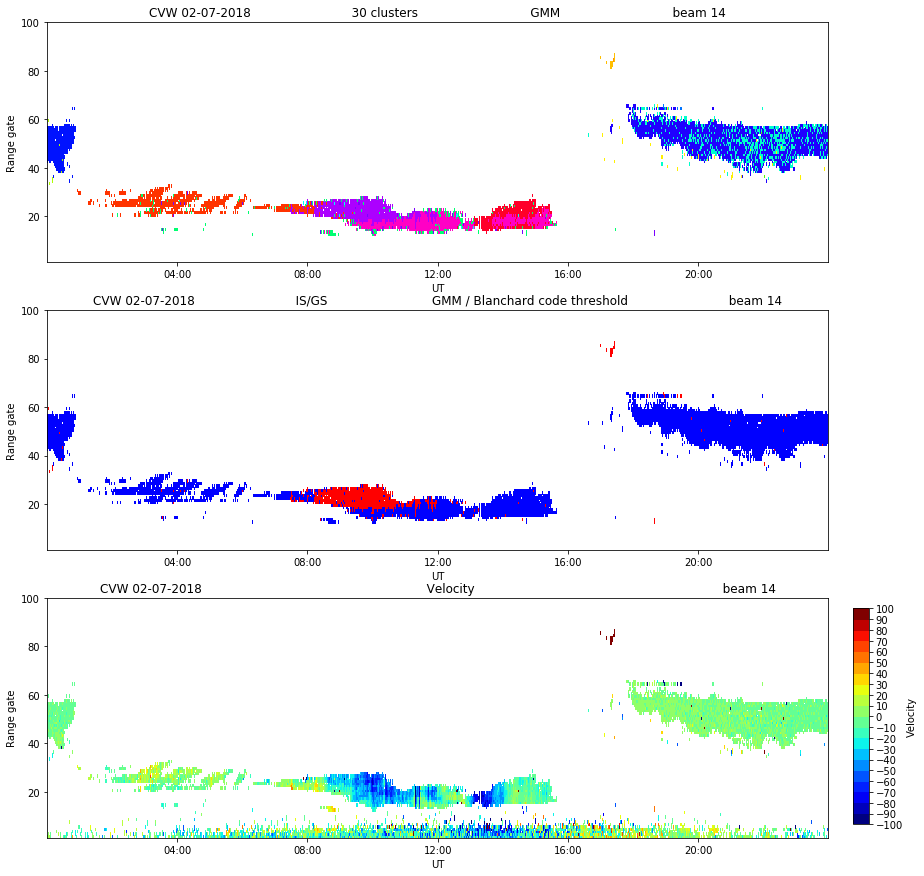

In [3]:
gmm.plot_rti(14, 'Blanchard code')

In [8]:
from algorithms.DBSCAN_GMM import DBSCAN_GMM
dbgmm = DBSCAN_GMM(start_time, end_time, 'cvw', useSavedResult=True, BoxCox=False   )
#dbgmm.save_result()
print(dbgmm.runtime)

17.689974546432495


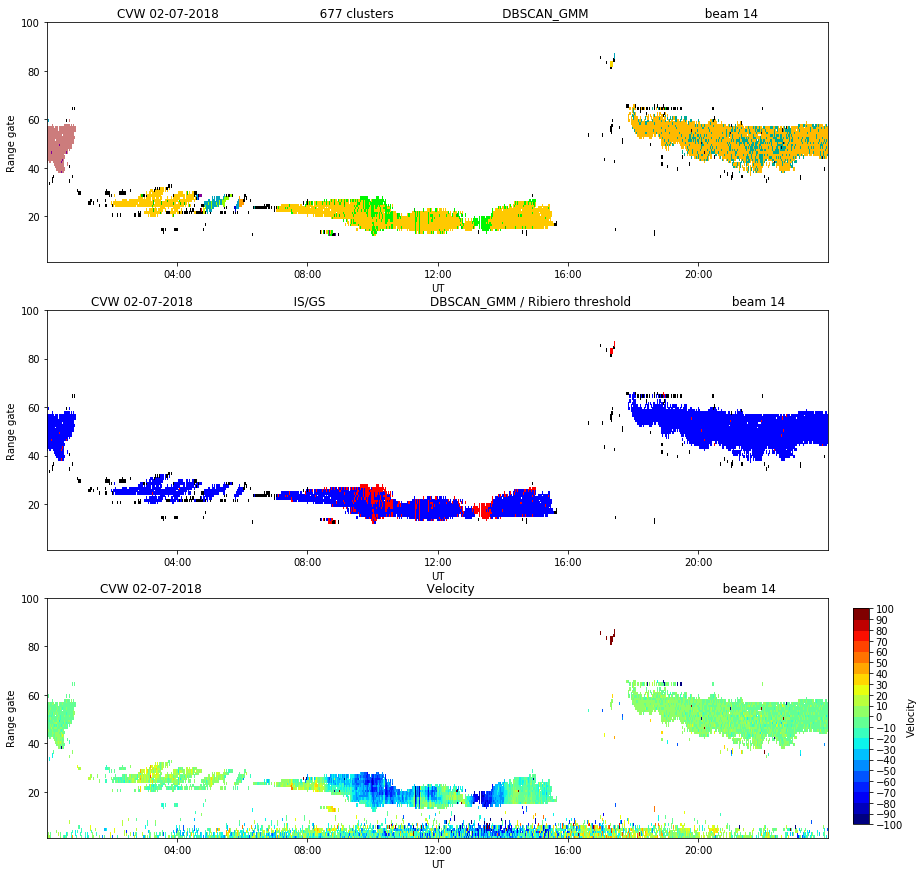

In [12]:
dbgmm.plot_rti(14, 'Ribiero')

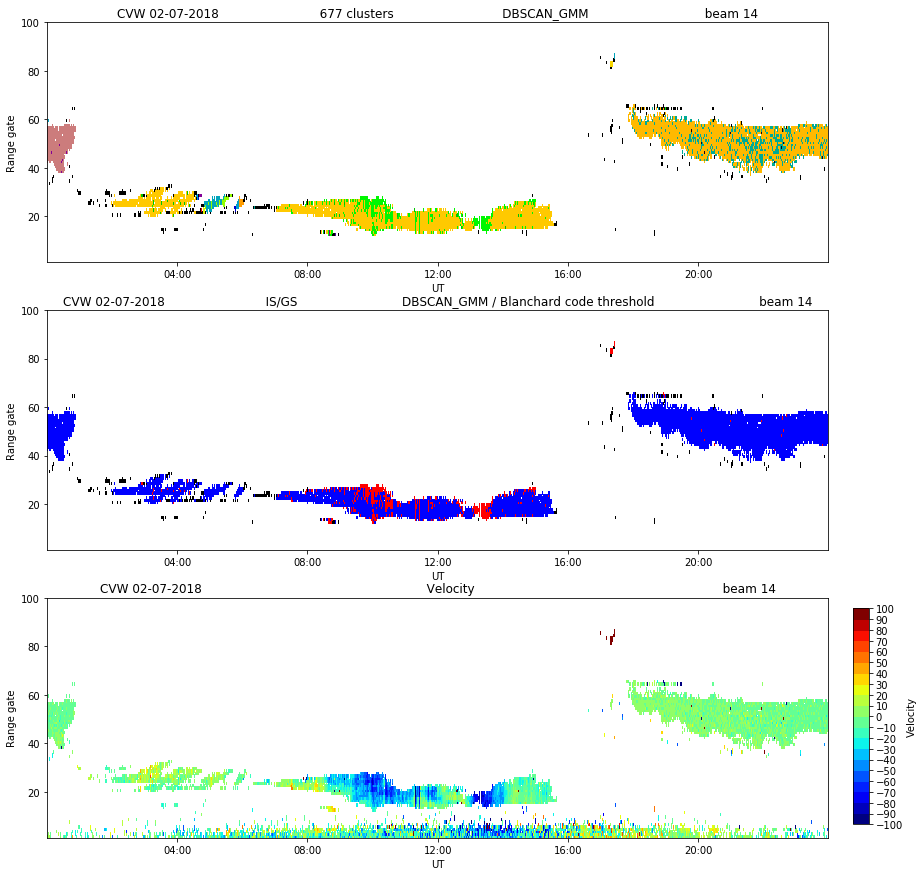

In [11]:
dbgmm.plot_rti(14, 'Blanchard code')